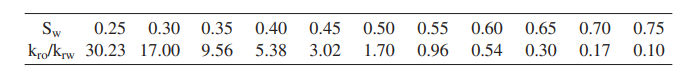

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Sw = [0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.7,0.75]
Kro_Krw = [30.23,17,9.56,5.38,3.02,1.7,0.96,0.54,0.3,0.17,0.1]

In [3]:
df = pd.DataFrame({"Sw" :Sw , "Kro/Krw" :Kro_Krw} )
df

,Sw,Kro/Krw
0,0.25,30.23
1,0.30,17.00
2,0.35,9.56
3,0.40,5.38
4,0.45,3.02
5,0.50,1.70
6,0.55,0.96
7,0.60,0.54
8,0.65,0.30
9,0.70,0.17


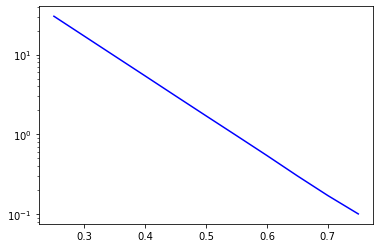

In [4]:
plt.semilogy(df["Sw"],df["Kro/Krw"], c = "b" )

In [5]:
model = np.polyfit(df["Sw"],np.log(df["Kro/Krw"]),1)

In [6]:
model

array([-11.47387085,   6.27172511])

In [7]:
sw = np.random.uniform(0.1,0.85,200)
sw

array([0.46483602, 0.66673627, 0.44124177, 0.37851447, 0.75796183,
       0.65619847, 0.80913959, 0.62234318, 0.18052363, 0.28977315,
       0.61657889, 0.13512583, 0.27744585, 0.72470823, 0.42691271,
       0.83666911, 0.27592573, 0.63017077, 0.80537436, 0.13939298,
       0.65541492, 0.40865972, 0.25513759, 0.54338561, 0.56869138,
       0.21868493, 0.32470591, 0.34078286, 0.3249575 , 0.66456896,
       0.5767083 , 0.7231955 , 0.28525136, 0.35883354, 0.68777684,
       0.60972346, 0.14827332, 0.61387217, 0.58110861, 0.53228663,
       0.57064981, 0.40894126, 0.75583623, 0.40300507, 0.54150162,
       0.49452678, 0.69905406, 0.61909434, 0.45865804, 0.64332315,
       0.21097467, 0.65818207, 0.5189379 , 0.46241252, 0.40389962,
       0.83246871, 0.78026431, 0.1605278 , 0.84541709, 0.78006615,
       0.6876121 , 0.62137872, 0.75109051, 0.51763911, 0.61625201,
       0.58576982, 0.51015702, 0.17262258, 0.54445643, 0.22372988,
       0.69203218, 0.64674426, 0.639774  , 0.76490366, 0.59743

In [8]:
af = pd.DataFrame({"sw" : sw})

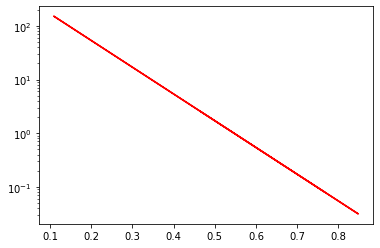

In [9]:
af["kro/krw"] = np.exp(model[1] + model[0] * af["sw"])
plt.semilogy(af["sw"],af["kro/krw"], c = "r")

In [10]:
bf = af.sort_values(by = 'sw')

In [12]:
def nd(oil_viscosity,water_viscosity):
    bf["fw"] = 1 /(1 + water_viscosity*bf["kro/krw"]/oil_viscosity)
    plt.figure(figsize = (14,8))

    plt.plot(bf["sw"],bf["fw"] , c = "b", label= " Sw v/s Fw")
    plt.title("Effect of fluid viscosities on Watercut(fw)")
    plt.xlabel("Water Saturation(Sw)")
    plt.ylabel("Water Cut fw")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.style.use('fivethirtyeight')
    

    plt.grid(True, color = 'g')

In [13]:
from ipywidgets import interact,interactive

In [14]:
interactive(nd , oil_viscosity =(0.5,5,0.2),water_viscosity = (0.5,5,0.2))

interactive(children=(FloatSlider(value=2.7, description='oil_viscosity', max=5.0, min=0.5, step=0.2), FloatSl…